In [9]:
import pandas as pd
from pymongo import MongoClient

# Load the data from the CSV file
data = pd.read_csv('Test_Inpatientdata-1542969243754.csv')

# Establish a connection to MongoDB
client = MongoClient('mongodb://localhost:27017/')  # Replace with your MongoDB URI   
db = client['BDT_Project']  # Replace with your database name
collection = db['medical']

In [10]:
# Display the first few rows of the dataset
print(data.head(5))

# Display basic information about the dataset
print(data.info())

      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11014  CLM67387   2009-09-09  2009-09-16  PRV57070   
1  BENE11017  CLM31237   2008-12-25  2009-01-08  PRV54750   
2  BENE11026  CLM78930   2009-12-09  2009-12-13  PRV53758   
3  BENE11031  CLM56810   2009-06-23  2009-07-06  PRV55825   
4  BENE11085  CLM34625   2009-01-20  2009-01-31  PRV52338   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                    9000          PHY317786          PHY427017   
1                   14000          PHY314656          PHY426644   
2                    2000          PHY349495                NaN   
3                   16000          PHY429538          PHY371893   
4                   19000          PHY397161                NaN   

  OtherPhysician AdmissionDt  ... ClmDiagnosisCode_7  ClmDiagnosisCode_8  \
0            NaN  2009-09-09  ...               5990                 570   
1            NaN  2008-12-25  ...               4549               29570   
2 

In [11]:
# Check for missing values
print(data.isnull().sum())

# Optionally, fill or drop missing values
data.fillna(method='ffill', inplace=True)  # Example: forward fill


BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64


C:\Users\rites\AppData\Local\Temp\ipykernel_19164\1964369451.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Example: forward fill


In [12]:
# Remove duplicates
data.drop_duplicates(inplace=True)


In [13]:
# Frequency of claims per beneficiary
data['ClaimFrequency'] = data.groupby('BeneID')['ClaimID'].transform('count')


In [14]:
# Average reimbursement amount per provider
data['AvgReimbursed'] = data.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')


In [15]:
# Calculate total reimbursement for each beneficiary
data['TotalReimbursement'] = data.groupby('BeneID')['InscClaimAmtReimbursed'].transform('sum')

# Calculate the ratio of deductible paid to total claims
data['DeductibleToTotalRatio'] = data['DeductibleAmtPaid'] / data['TotalReimbursement'].replace(0, 1)  # Avoid division by zero


In [16]:
# Example condition for fraud detection (adjust based on your criteria)
data['actual_fraud'] = (data['DeductibleToTotalRatio'] > 0.1) & (data['ClaimFrequency'] > 1)  # Example criteria

# Convert to integers (1 for fraud, 0 for not fraud)
data['actual_fraud'] = data['actual_fraud'].astype(int)

sampled_data = data.sample(n=500, random_state=42)

sampled_data['actual_fraud'] = sampled_data['actual_fraud'].apply(lambda x: 1 if x == 0 else 0)

data.update(sampled_data)


C:\Users\rites\AppData\Local\Temp\ipykernel_19164\705932063.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.update(sampled_data)


In [17]:
# Display information about the 'actual_fraud' column
print(data['actual_fraud'].info())

# Alternatively, check the data type specifically
print(data['actual_fraud'].dtype)

# To see unique values and their counts
print(data['actual_fraud'].value_counts())


<class 'pandas.core.series.Series'>
RangeIndex: 9551 entries, 0 to 9550
Series name: actual_fraud
Non-Null Count  Dtype
--------------  -----
9551 non-null   int64
dtypes: int64(1)
memory usage: 74.7 KB
None
int64
actual_fraud
0    8675
1     876
Name: count, dtype: int64


In [18]:
data


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimFrequency,AvgReimbursed,TotalReimbursement,DeductibleToTotalRatio,actual_fraud
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5849.0,NaN,NaN,NaN,NaN,1,16250.000000,9000,0.118667,1
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,5849.0,NaN,NaN,NaN,NaN,1,8666.666667,14000,0.076286,0
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,PHY426644,NaN,2009-12-09,...,5849.0,NaN,NaN,NaN,NaN,1,10297.368421,2000,0.534000,0
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,3320.0,NaN,NaN,NaN,NaN,1,9629.268293,16000,0.066750,1
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,PHY371893,NaN,2009-01-20,...,3320.0,NaN,NaN,NaN,NaN,1,10295.394737,19000,0.056211,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,BENE159139,CLM61015,2009-07-24,2009-07-26,PRV55021,23000,PHY406228,PHY406228,PHY411572,2009-07-24,...,4019.0,6011.0,4439.0,4139.0,NaN,1,8769.230769,23000,0.046435,0
9547,BENE159143,CLM42885,2009-03-16,2009-03-29,PRV55017,34000,PHY354080,PHY406228,PHY411572,2009-03-16,...,4019.0,6011.0,4439.0,4139.0,NaN,1,18666.666667,34000,0.031412,0
9548,BENE159155,CLM67124,2009-09-07,2009-10-12,PRV53758,5000,PHY338118,PHY406228,PHY411572,2009-09-07,...,4019.0,6011.0,4439.0,4139.0,NaN,1,10297.368421,5000,0.213600,0
9549,BENE159181,CLM72016,2009-10-14,2009-10-17,PRV57195,3000,PHY328451,PHY406228,PHY411572,2009-10-14,...,4019.0,6011.0,4439.0,4139.0,NaN,1,10760.869565,3000,0.356000,0


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc


# Assuming 'data' is your preprocessed DataFrame

# Step 1: Define features and labels
X = data.drop(columns=['BeneID', 'ClaimID', 'actual_fraud', 'ClaimStartDt', 'ClaimEndDt', 'AdmissionDt',
                       'Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'])
y = data['actual_fraud']

# Step 2: Check the data types of the features
print(X.dtypes)

# Step 3: Drop any remaining non-numeric columns (if any)
X = X.select_dtypes(include=['number'])

# Step 4: Check for NaN values in X
print(X.isnull().sum())  # Check for any missing values in features

# Handle NaN values
X.fillna(0, inplace=True)  # Replace NaNs with 0, or you can use other methods

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


InscClaimAmtReimbursed      int64
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
ClaimFrequency              int64
AvgReimbursed             float64
TotalReimbursement          int64
DeductibleToTotalRatio    float64
dtype: object
InscClaimAmtReimbursed       0
DeductibleAmtPaid            0
ClmProcedureCode_1           0
ClmProcedureCode_2           0
ClmProcedure

In [20]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                   Feature  Importance
8           ClaimFrequency    0.368982
11  DeductibleToTotalRatio    0.268551
10      TotalReimbursement    0.239964
0   InscClaimAmtReimbursed    0.094467
9            AvgReimbursed    0.008374
2       ClmProcedureCode_1    0.007625
3       ClmProcedureCode_2    0.004806
4       ClmProcedureCode_3    0.003831
5       ClmProcedureCode_4    0.002454
6       ClmProcedureCode_5    0.000945
1        DeductibleAmtPaid    0.000000
7       ClmProcedureCode_6    0.000000


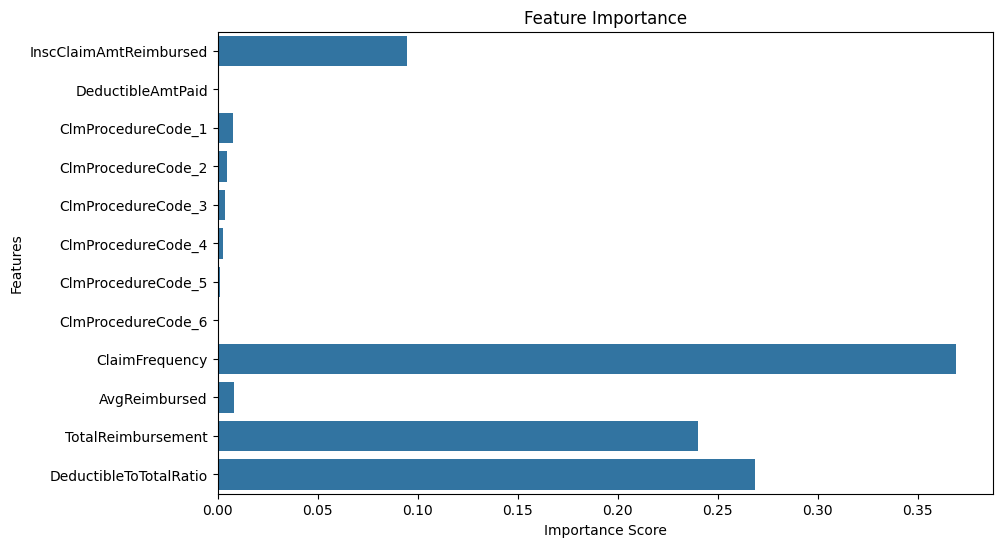

In [21]:
# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [22]:
# Step 1: Define features and labels
X = data.drop(columns=['BeneID', 'ClaimID', 'actual_fraud', 'ClaimStartDt', 'ClaimEndDt',
                       'AdmissionDt', 'Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'])
y = data['actual_fraud']

# Drop non-numeric columns and handle NaN values
X = X.select_dtypes(include=['number'])
X.fillna(0, inplace=True)  # Replace NaNs with 0
# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [23]:
# Step 3: Initialize and train the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)
# Step 5: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1356   15]
 [ 485   55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.84      1371
           1       0.79      0.10      0.18       540

    accuracy                           0.74      1911
   macro avg       0.76      0.55      0.51      1911
weighted avg       0.75      0.74      0.66      1911



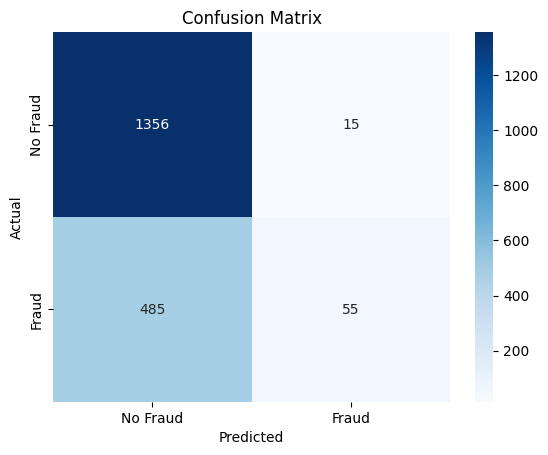

In [24]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

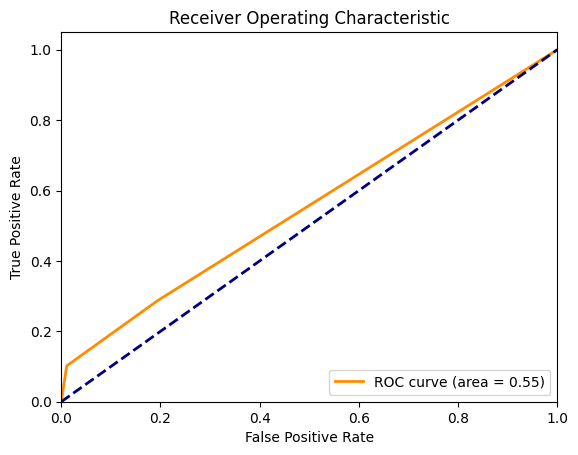

In [25]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


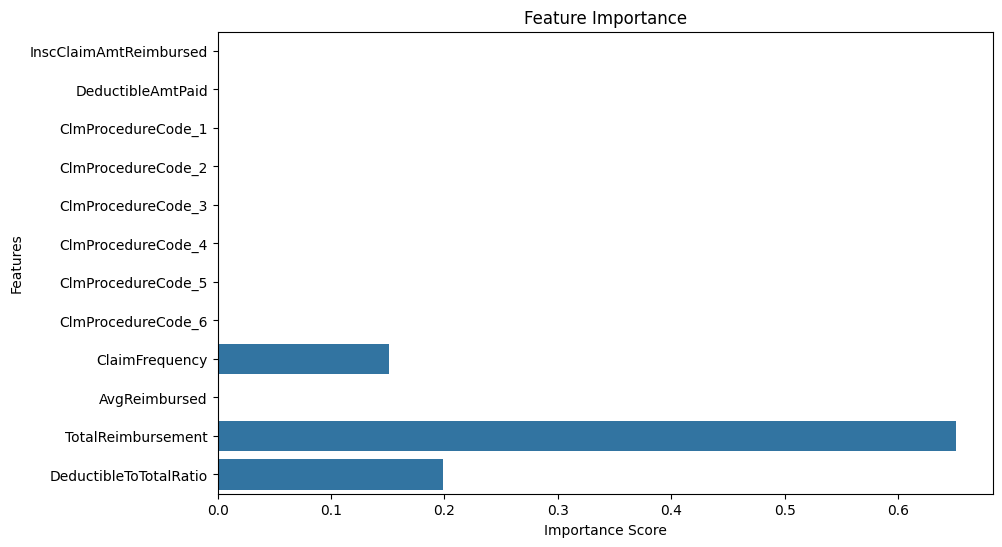

In [26]:
# Feature Importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [28]:
# Step 1: Define features and labels
X = data.drop(columns=['BeneID', 'ClaimID', 'actual_fraud', 'ClaimStartDt', 'ClaimEndDt',
                       'AdmissionDt', 'Provider', 'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'])
y = data['actual_fraud']

# Drop non-numeric columns and handle NaN values
X = X.select_dtypes(include=['number'])
X.fillna(0, inplace=True)  # Replace NaNs with 0


In [29]:
# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Step 3: Initialize and train the SVM model
model = SVC(probability=True, random_state=42)  # Set probability=True to enable probability estimates
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)


In [31]:
# Step 5: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[1365    6]
 [ 533    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84      1371
           1       0.54      0.01      0.03       540

    accuracy                           0.72      1911
   macro avg       0.63      0.50      0.43      1911
weighted avg       0.67      0.72      0.61      1911



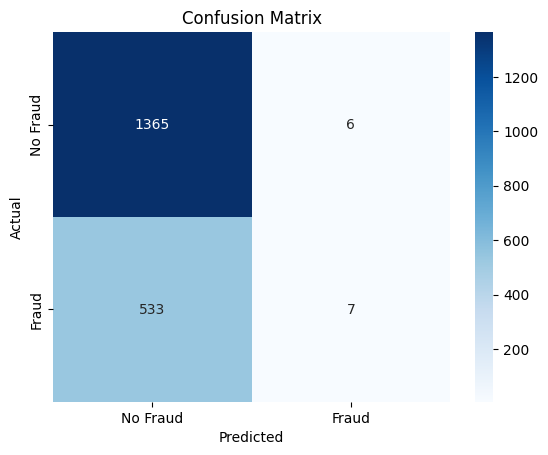

In [32]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


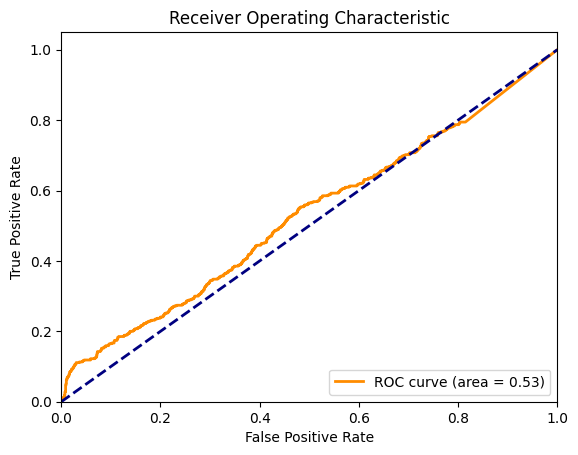

In [33]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
